In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotnine import *

In [ ]:
# read dataset.
df = pd.read_csv("/content/drive/My Drive/2023_fall/BA305/BA_305_Project/Process_data/weatherAUS.csv")
df.RainTomorrow.replace(('Yes', 'No'), (int(1), int(0)), inplace=True)
df.head(20)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.0
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.0
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0


In [ ]:
##drop之前是不是要先来一次df.info()展现一下我们有哪些variables是主要missing value & why drop
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cl

In [ ]:
X = list(df.columns)[:-1]
y = df[["RainTomorrow"]]

In [ ]:
X_numerical = df[X].select_dtypes(include='number')
X_numerical
##这里data的顺序是乱的 我们是不是要重新排一下index？

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0
6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,19.3,33.4,0.0,6.0,11.0,35.0,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3
142299,21.2,32.6,0.0,7.6,8.6,37.0,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0
142300,20.7,32.8,0.0,5.6,11.0,33.0,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1
142301,19.5,31.8,0.0,6.2,10.6,26.0,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2


In [ ]:
corr_mat = X_numerical.corr()
corr_mat

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.749687,0.110800,0.506764,0.076087,0.118054,0.108522,0.137273,-0.174991,0.070827,-0.475661,-0.495577,0.106177,0.042173,0.906295,0.727222
MaxTemp,0.749687,1.000000,-0.069981,0.650964,0.463913,0.035531,-0.008171,0.012266,-0.495781,-0.448116,-0.350980,-0.451691,-0.263634,-0.257752,0.893387,0.984841
Rainfall,0.110800,-0.069981,1.000000,-0.077239,-0.246379,0.106308,0.050584,0.044112,0.263625,0.277625,-0.180606,-0.137302,0.217169,0.191433,0.013713,-0.074627
Evaporation,0.506764,0.650964,-0.077239,1.000000,0.369250,0.209566,0.193154,0.124345,-0.554232,-0.422436,-0.297319,-0.325954,-0.199809,-0.202366,0.593122,0.630727
Sunshine,0.076087,0.463913,-0.246379,0.369250,1.000000,-0.052422,-0.013842,0.029200,-0.500343,-0.629299,0.043330,-0.020632,-0.677939,-0.702022,0.289038,0.486129
WindGustSpeed,0.118054,0.035531,0.106308,0.209566,-0.052422,1.000000,0.608852,0.685236,-0.193410,-0.042653,-0.430363,-0.383683,0.088129,0.131590,0.085520,-0.000382
WindSpeed9am,0.108522,-0.008171,0.050584,0.193154,-0.013842,0.608852,1.000000,0.502226,-0.236795,-0.058449,-0.201518,-0.155484,0.034908,0.062507,0.053749,-0.018357
WindSpeed3pm,0.137273,0.012266,0.044112,0.124345,0.029200,0.685236,0.502226,1.000000,-0.100626,0.031843,-0.293155,-0.252095,0.068224,0.041475,0.114043,-0.009436
Humidity9am,-0.174991,-0.495781,0.263625,-0.554232,-0.500343,-0.193410,-0.236795,-0.100626,1.000000,0.685697,0.114575,0.172972,0.438962,0.348707,-0.423598,-0.487758
Humidity3pm,0.070827,-0.448116,0.277625,-0.422436,-0.629299,-0.042653,-0.058449,0.031843,0.685697,1.000000,-0.063454,0.024109,0.509223,0.510996,-0.151614,-0.497245


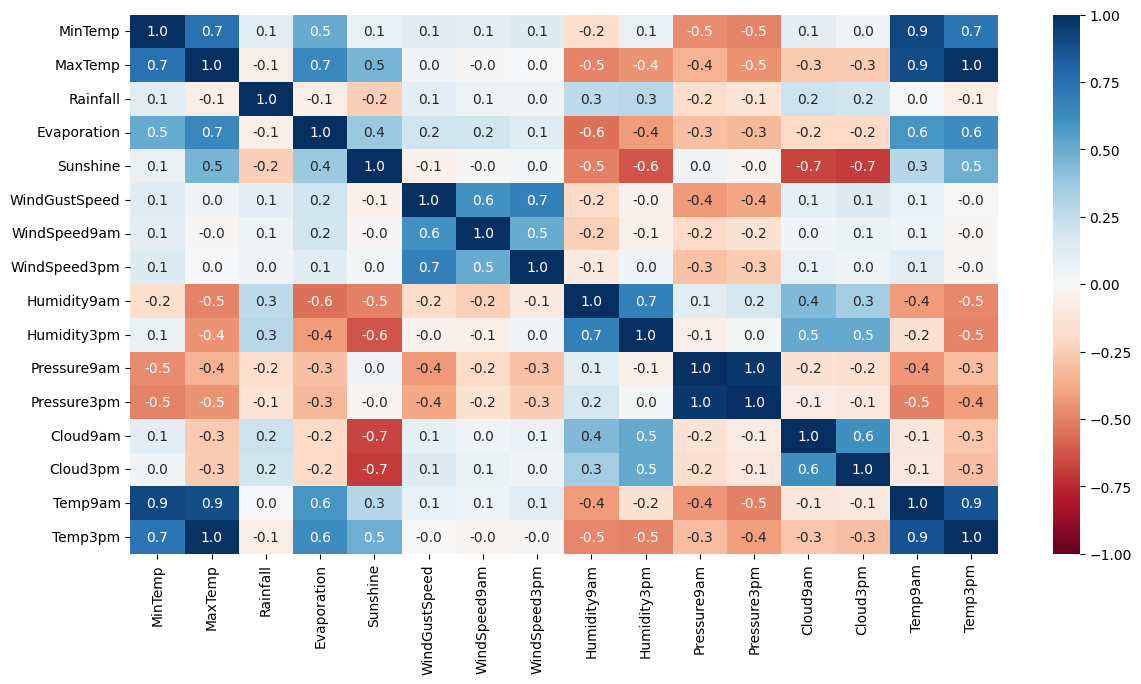

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(corr_mat, annot=True, fmt=".1f",vmin=-1,vmax=1, cmap='RdBu');

In [ ]:
from sklearn import preprocessing
from sklearn.decomposition import  PCA
# Normalization
X_norm = preprocessing.scale(X_numerical)
pcs = PCA()
pcs.fit(X_norm)

pcsSummary_df = pd.DataFrame({
            'Proportion of variance': pcs.explained_variance_ratio_,
            'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
            })
pcsSummary_df.round(3)

,Proportion of variance,Cumulative proportion
0,0.346,0.346
1,0.213,0.558
2,0.135,0.693
3,0.064,0.757
4,0.057,0.813
5,0.047,0.860
6,0.030,0.890
7,0.026,0.916
8,0.025,0.941
9,0.020,0.960


In [ ]:
var = list(X_numerical.columns)
pd.DataFrame(pcs.components_.transpose(), index=[var]).round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
MinTemp,0.29,0.24,-0.26,-0.20,0.18,-0.22,0.14,0.02,-0.02,-0.10,0.08,0.05,-0.68,-0.37,-0.13,0.04
MaxTemp,0.39,0.01,-0.20,-0.10,0.05,-0.02,-0.10,-0.17,-0.10,0.19,0.08,-0.05,0.40,-0.08,-0.38,0.63
Rainfall,-0.05,0.22,-0.09,0.31,0.72,0.54,-0.10,-0.08,0.04,-0.09,-0.08,0.01,0.01,-0.01,0.00,0.01
Evaporation,0.32,0.02,0.03,-0.23,-0.02,0.28,-0.06,0.75,0.37,0.18,-0.05,-0.12,0.04,0.01,0.05,-0.01
Sunshine,0.25,-0.32,0.12,0.21,0.15,-0.19,-0.04,0.08,-0.05,0.17,-0.51,0.64,-0.03,-0.05,0.02,-0.00
WindGustSpeed,0.10,0.28,0.49,-0.02,0.03,0.00,-0.19,-0.07,0.09,0.20,0.62,0.46,-0.01,0.01,0.03,-0.02
WindSpeed9am,0.07,0.18,0.47,-0.28,0.17,0.09,0.64,-0.01,-0.37,0.15,-0.19,-0.12,0.08,0.03,0.02,0.02
WindSpeed3pm,0.08,0.23,0.45,-0.07,0.19,-0.41,-0.48,-0.07,0.14,-0.16,-0.32,-0.37,0.03,-0.03,-0.04,-0.00
Humidity9am,-0.29,0.16,-0.22,0.16,0.21,-0.35,-0.07,0.22,-0.20,0.68,0.05,-0.16,-0.09,0.18,0.13,0.06
Humidity3pm,-0.24,0.30,-0.19,-0.02,0.18,-0.38,0.33,0.17,0.34,-0.20,0.00,0.24,0.47,-0.16,-0.14,-0.12


In [ ]:
eig=pcs.explained_variance_.round(2)
print(eig)

[5.53 3.41 2.15 1.02 0.9  0.75 0.48 0.42 0.4  0.31 0.26 0.22 0.09 0.03
 0.02 0.01]


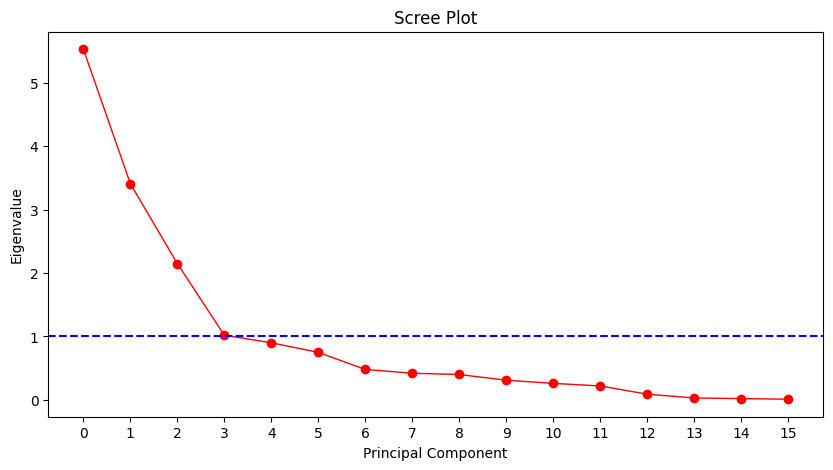

In [ ]:
# scree plot of eigenvalues
# define the x values, i.e., components
xvals = np.arange(X_numerical.shape[1])
#figure size
plt.figure(figsize=(10,5))
#plot in red color
plt.plot(xvals, eig, 'ro-', linewidth=1)
#set ticks to every unit
plt.xticks(xvals)

#add labels...
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

#add a horizontal line in blue for latent root criterion
plt.axhline(y=1, color='b', linestyle='--')

The latent root criterion suggests keeping the first 4 components.

In [ ]:
pcs = PCA(n_components=4)
principalComponents = pcs.fit_transform(X_norm)

# make the output more readable by creating a new dataframe
principalDF = pd.DataFrame(
        data = principalComponents.round(2),
        columns = ['F1','F2','F3','F4']
        )

principalDF

,F1,F2,F3,F4
0,4.65,-0.24,-0.14,0.68
1,3.69,-1.71,0.88,0.08
2,4.20,0.14,0.21,-0.82
3,4.31,-1.17,-2.17,0.08
4,5.26,-0.10,-1.31,-0.82
...,...,...,...,...
56415,2.80,-1.16,-0.87,1.01
56416,2.55,-0.43,-1.38,-0.10
56417,3.13,-1.76,-0.69,0.58
56418,2.08,-0.93,-1.54,0.85


In [ ]:
principalDF.corr().round(4)

,F1,F2,F3,F4
F1,1.0,-0.0,0.0,0.0
F2,-0.0,1.0,-0.0,-0.0
F3,0.0,-0.0,1.0,-0.0
F4,0.0,-0.0,-0.0,1.0


No PCA because:
1. information lost (not enough to capture patterns)
2. Some original variables have relative high correlation to muiltiple components
3. hard to name components & not make sense in real life

Now we examinate if we need PCA for imputing dataset

In [ ]:
df2 = pd.read_csv("/content/drive/My Drive/2023_fall/BA305/BA_305_Project/Process_data/weatherAUS_imputation.csv")
df2.RainTomorrow.replace(('Yes', 'No'), (int(1), int(0)), inplace=True)
df2

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Temp3pm,Latitude,Longitude,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,9.6,13.0,44.0,20.0,24.0,71.0,22.0,...,21.8,-36.075119,146.909485,2008-12-01,Albury,W,W,WNW,No,0
1,7.4,25.1,0.0,13.0,13.2,44.0,4.0,22.0,44.0,25.0,...,24.3,-36.075119,146.909485,2008-12-02,Albury,WNW,NNW,WSW,No,0
2,12.9,25.7,0.0,10.2,13.2,46.0,19.0,26.0,38.0,30.0,...,23.2,-36.075119,146.909485,2008-12-03,Albury,WSW,W,WSW,No,0
3,9.2,28.0,0.0,11.0,10.8,24.0,11.0,9.0,45.0,16.0,...,26.5,-36.075119,146.909485,2008-12-04,Albury,NE,SE,E,No,0
4,17.5,32.3,1.0,6.6,8.1,41.0,7.0,20.0,82.0,33.0,...,29.7,-36.075119,146.909485,2008-12-05,Albury,W,ENE,NW,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123705,3.5,21.8,0.0,2.2,0.0,31.0,15.0,13.0,59.0,27.0,...,20.9,-25.344428,131.036882,2017-06-20,Uluru,E,ESE,E,No,0
123706,2.8,23.4,0.0,2.0,9.1,31.0,13.0,11.0,51.0,24.0,...,22.4,-25.344428,131.036882,2017-06-21,Uluru,E,SE,ENE,No,0
123707,3.6,25.3,0.0,1.4,8.7,22.0,13.0,9.0,56.0,21.0,...,24.5,-25.344428,131.036882,2017-06-22,Uluru,NNW,SE,N,No,0
123708,5.4,26.9,0.0,4.0,5.9,37.0,9.0,9.0,53.0,24.0,...,26.1,-25.344428,131.036882,2017-06-23,Uluru,N,SE,WNW,No,0


In [ ]:
df2 = df2.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123710 entries, 0 to 123709
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        123710 non-null  float64
 1   MaxTemp        123710 non-null  float64
 2   Rainfall       123710 non-null  float64
 3   Evaporation    123710 non-null  float64
 4   Sunshine       123710 non-null  float64
 5   WindGustSpeed  123710 non-null  float64
 6   WindSpeed9am   123710 non-null  float64
 7   WindSpeed3pm   123710 non-null  float64
 8   Humidity9am    123710 non-null  float64
 9   Humidity3pm    123710 non-null  float64
 10  Pressure9am    123710 non-null  float64
 11  Pressure3pm    123710 non-null  float64
 12  Cloud9am       123710 non-null  float64
 13  Cloud3pm       123710 non-null  float64
 14  Temp9am        123710 non-null  float64
 15  Temp3pm        123710 non-null  float64
 16  Latitude       123710 non-null  float64
 17  Longitude      123710 non-nul

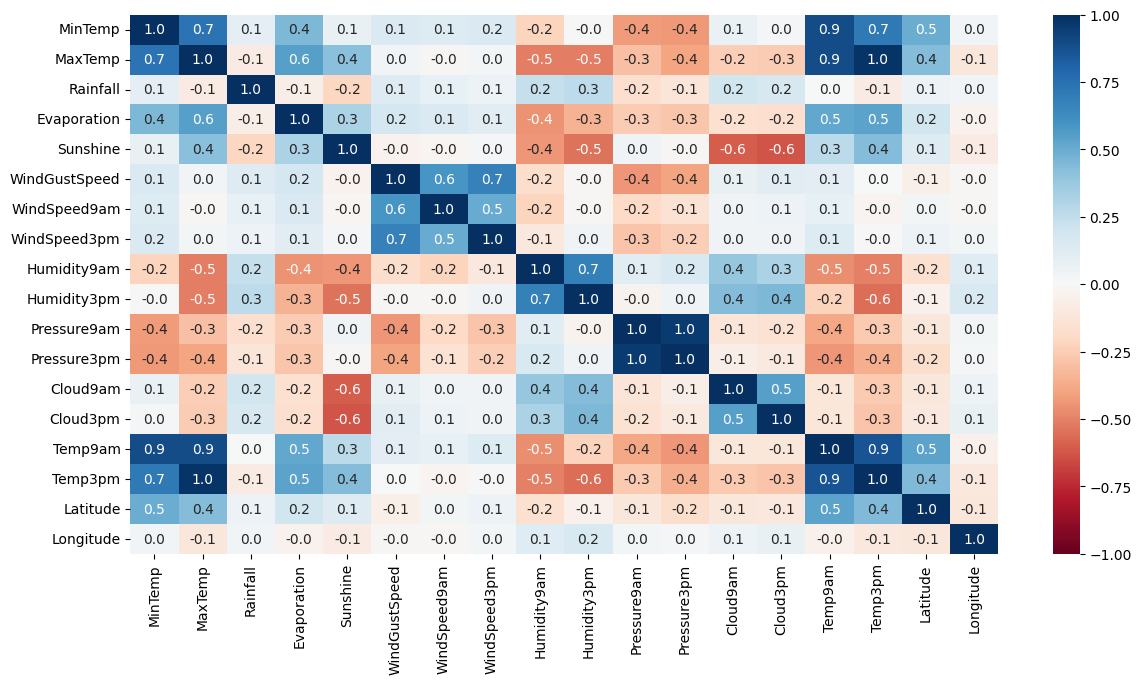

In [ ]:
X2 = list(df2.columns)[:-1]
y2 = df2[["RainTomorrow"]]
X_numerical2 = df2[X2].select_dtypes(include='number')
corr_mat = X_numerical2.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr_mat, annot=True, fmt=".1f",vmin=-1,vmax=1, cmap='RdBu');

In [ ]:
# Normalization
X_norm2 = preprocessing.scale(X_numerical2)
pcs = PCA()
pcs.fit(X_norm2)

pcsSummary_df = pd.DataFrame({
            'Proportion of variance': pcs.explained_variance_ratio_,
            'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
            })
pcsSummary_df.round(3)

,Proportion of variance,Cumulative proportion
0,0.307,0.307
1,0.180,0.488
2,0.116,0.604
3,0.064,0.668
4,0.057,0.725
5,0.057,0.782
6,0.044,0.826
7,0.034,0.860
8,0.030,0.890
9,0.026,0.916


In [ ]:
var2 = list(X_numerical2.columns)
pd.DataFrame(pcs.components_.transpose(), index=[var2]).round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
MinTemp,0.31,0.21,-0.27,0.22,0.02,-0.08,-0.06,0.13,-0.08,-0.24,-0.12,0.12,-0.10,0.04,-0.68,-0.37,0.07,-0.03
MaxTemp,0.39,-0.03,-0.17,0.02,-0.07,-0.04,0.06,0.01,-0.25,-0.04,-0.09,-0.08,0.17,-0.00,0.39,-0.11,0.37,-0.63
Rainfall,-0.04,0.23,-0.10,0.09,0.47,0.29,0.77,-0.10,-0.07,0.10,-0.02,0.01,-0.10,-0.06,0.01,-0.01,-0.01,-0.01
Evaporation,0.28,0.01,0.04,0.01,-0.16,-0.18,0.29,0.57,0.58,0.28,0.10,0.01,0.13,-0.07,0.02,0.01,-0.02,0.01
Sunshine,0.22,-0.31,0.19,-0.06,0.29,0.02,-0.05,0.22,-0.05,-0.05,0.02,-0.63,-0.47,0.23,-0.04,-0.03,-0.01,0.00
WindGustSpeed,0.09,0.32,0.45,0.06,-0.01,0.01,0.02,0.04,-0.14,0.13,-0.09,0.13,0.21,0.76,0.00,0.02,-0.01,0.02
WindSpeed9am,0.07,0.23,0.42,0.36,-0.09,0.03,0.08,-0.16,0.26,-0.61,0.05,-0.26,0.15,-0.22,0.09,0.02,-0.02,-0.01
WindSpeed3pm,0.08,0.27,0.41,0.28,0.09,0.00,-0.23,0.18,-0.36,0.44,0.01,0.04,-0.13,-0.50,0.01,-0.04,0.02,0.00
Humidity9am,-0.28,0.15,-0.24,0.00,0.28,0.08,-0.16,0.41,-0.17,-0.06,-0.00,-0.37,0.57,-0.03,-0.11,0.18,-0.13,-0.06
Humidity3pm,-0.24,0.28,-0.21,0.17,0.22,0.03,-0.25,0.31,0.22,-0.18,-0.26,0.18,-0.32,0.11,0.47,-0.16,0.16,0.12


In [ ]:
eig2=pcs.explained_variance_.round(2)
eig2

array([5.53, 3.25, 2.09, 1.16, 1.03, 1.02, 0.8 , 0.61, 0.55, 0.46, 0.44,
       0.34, 0.31, 0.25, 0.1 , 0.03, 0.02, 0.01])

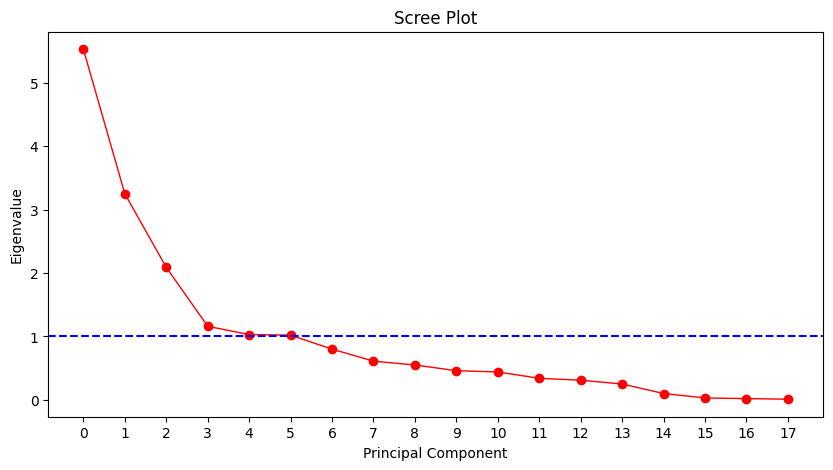

In [ ]:
# scree plot of eigenvalues
# define the x values, i.e., components
xvals2 = np.arange(X_numerical2.shape[1])
#figure size
plt.figure(figsize=(10,5))
#plot in red color
plt.plot(xvals2, eig2, 'ro-', linewidth=1)
#set ticks to every unit
plt.xticks(xvals2)

#add labels...
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

#add a horizontal line in blue for latent root criterion
plt.axhline(y=1, color='b', linestyle='--')

In [ ]:
pcs = PCA(n_components=6)
principalComponents = pcs.fit_transform(X_norm2)

# make the output more readable by creating a new dataframe
principalDF = pd.DataFrame(
        data = principalComponents.round(2),
        columns = ['F1','F2','F3','F4',"F5","F6"]
        )

principalDF

,F1,F2,F3,F4,F5,F6
0,1.06,1.06,1.00,-1.30,-0.39,-0.84
1,1.88,-1.07,1.20,-2.07,0.30,-0.91
2,2.46,-0.24,1.93,-1.11,0.48,-0.77
3,1.20,-1.44,-0.56,-1.29,-1.31,-1.16
4,1.21,1.20,-1.17,-1.50,-0.61,-0.92
...,...,...,...,...,...,...
123705,-1.11,-2.27,0.28,0.34,-0.35,1.45
123706,-0.63,-2.43,0.10,0.08,-0.69,1.29
123707,-0.83,-1.70,-0.94,-0.14,-1.70,1.04
123708,0.03,-1.49,-0.61,-0.43,-1.21,1.04


In [ ]:
principalDF.corr().round(4)

,F1,F2,F3,F4,F5,F6
F1,1.0,0.0,-0.0,-0.0,0.0,-0.0
F2,0.0,1.0,0.0,0.0,-0.0,0.0
F3,-0.0,0.0,1.0,0.0,0.0,0.0
F4,-0.0,0.0,0.0,1.0,-0.0,0.0
F5,0.0,-0.0,0.0,-0.0,1.0,-0.0
F6,-0.0,0.0,0.0,0.0,-0.0,1.0
